출처 : [https://github.com/lowlighter/metrics/blob/master/.github/readme/partials/documentation/setup/action.md](https://github.com/lowlighter/metrics/blob/master/.github/readme/partials/documentation/setup/action.md)

### **깃허브 이름과 같은 레포지토리(이하 레포) 생성**



Repository name에 본인의 깃허브 이름을 넣습니다. 저의 경우는 GBDO가 되죠, 그리고 Add a README file을 체크한 후 Create repository를 클릭하여 생성을 마칩니다.

### **토큰 만들기**

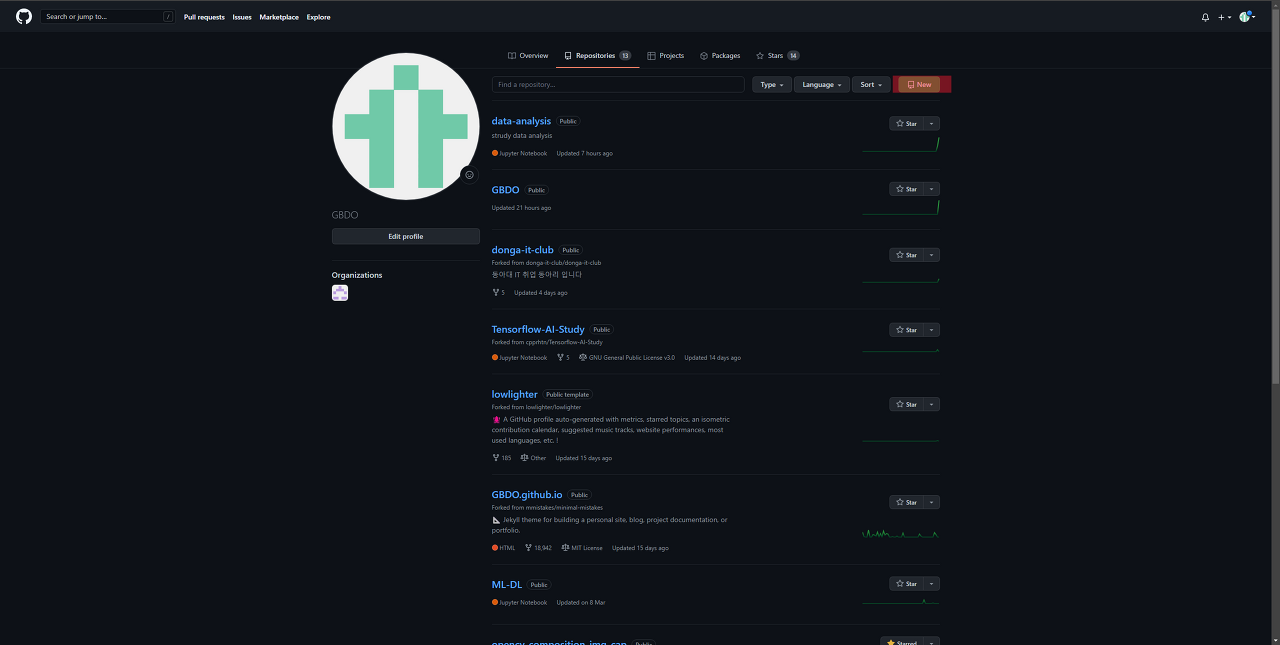

레포지토리 탭에 들어가 'New' 클릭

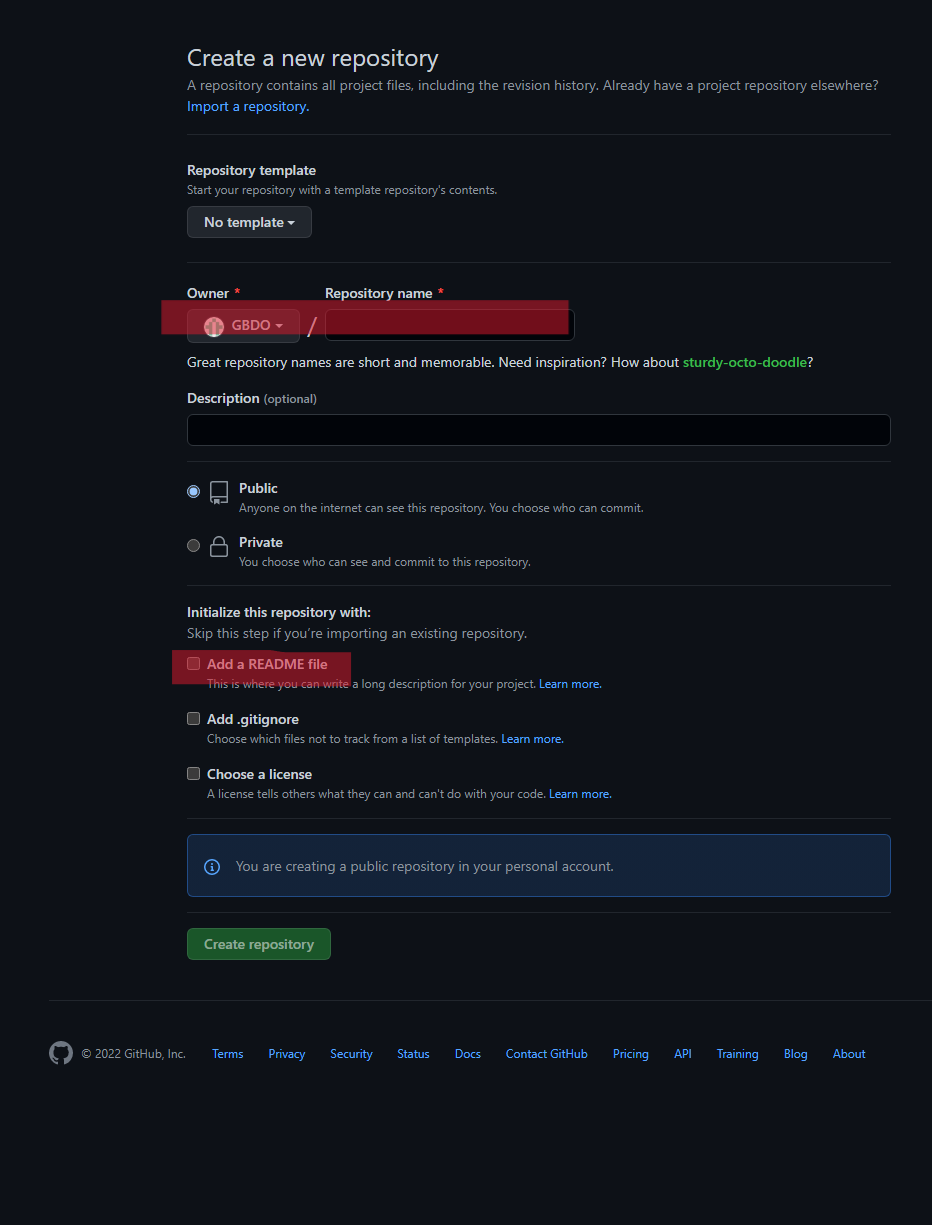

레포 생성 창, Repository name에 본인의 깃허브 이름을 넣습니다. 저의 경우는 GBDO가 되죠, 그리고 Add a README file을 체크한 후 Create repository를 클릭하여 생성을 마칩니다.

### **토큰 만들기**

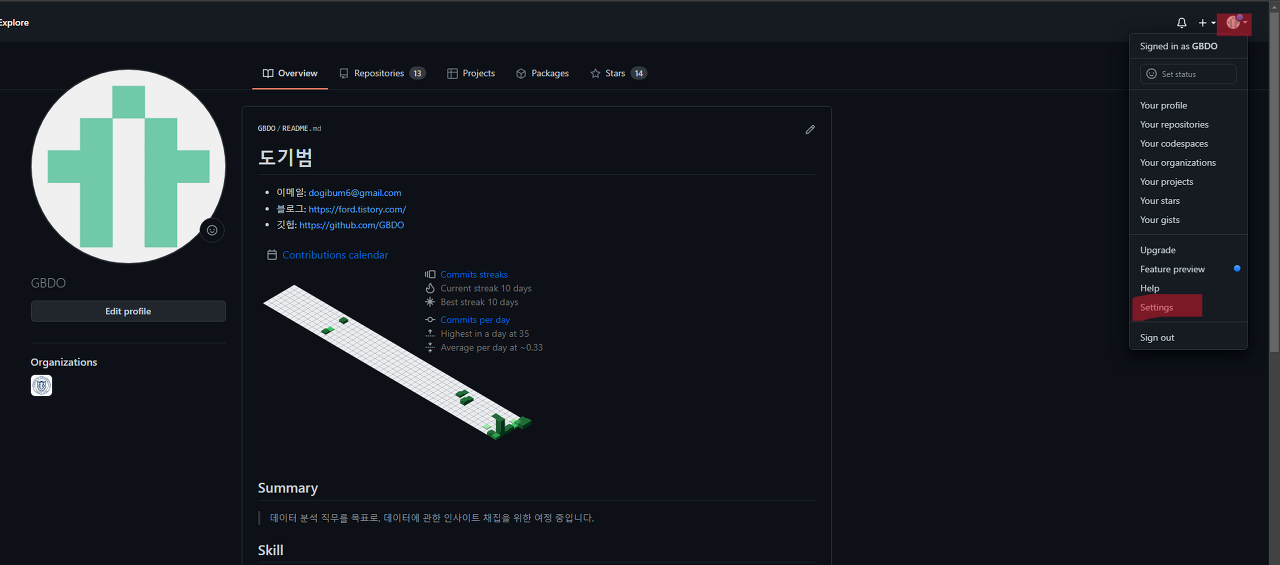

오른쪽 상단에 프로필을 클릭 -> 나오는 메뉴에서 Setting을 클릭

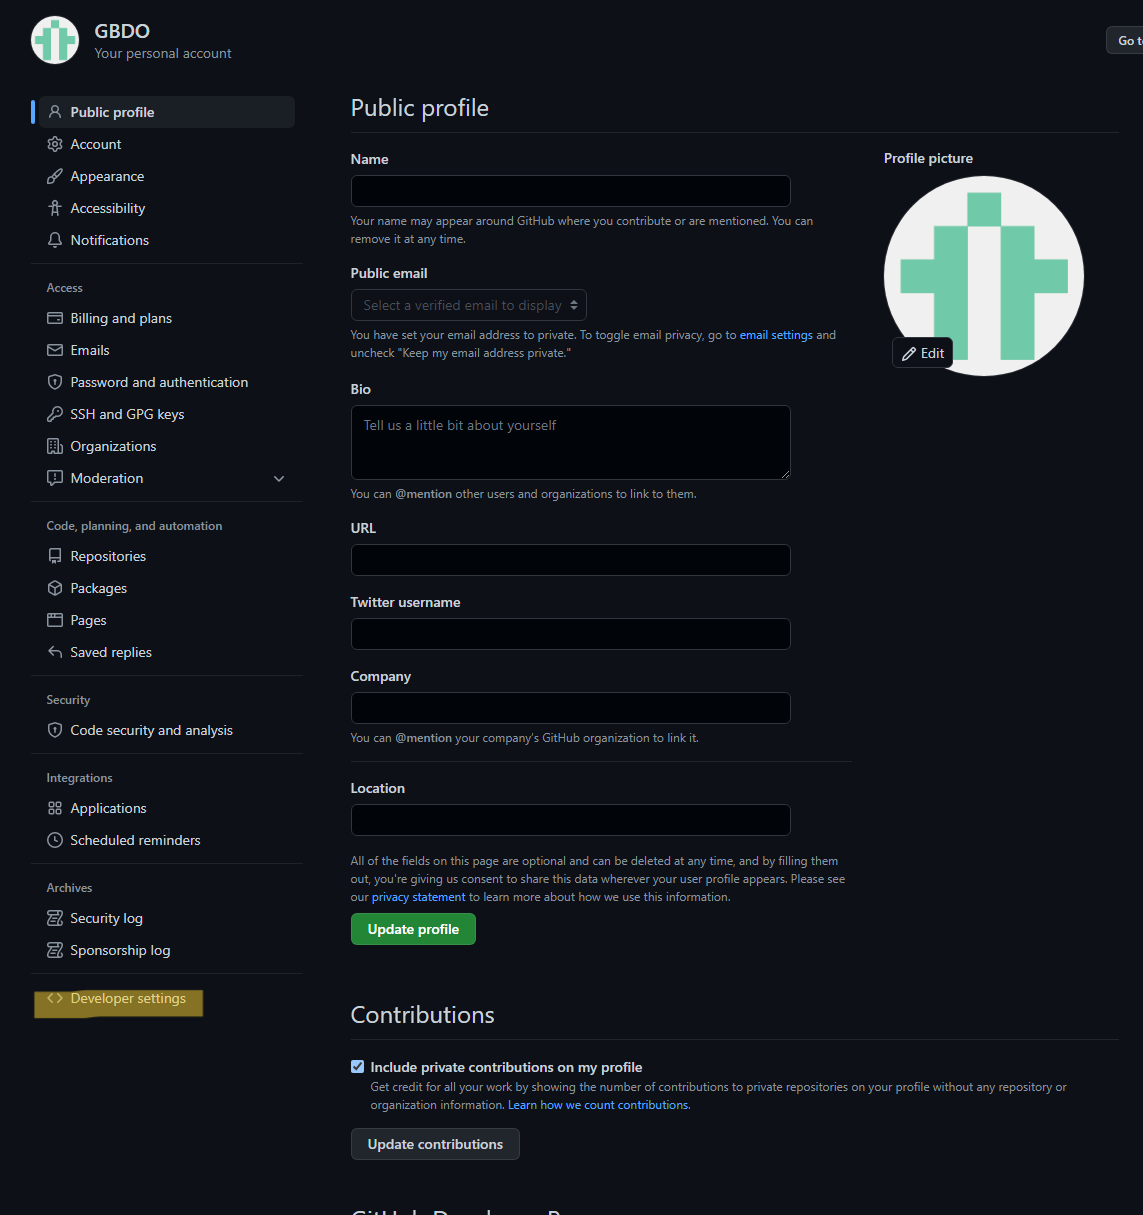


Developer settings을 클릭

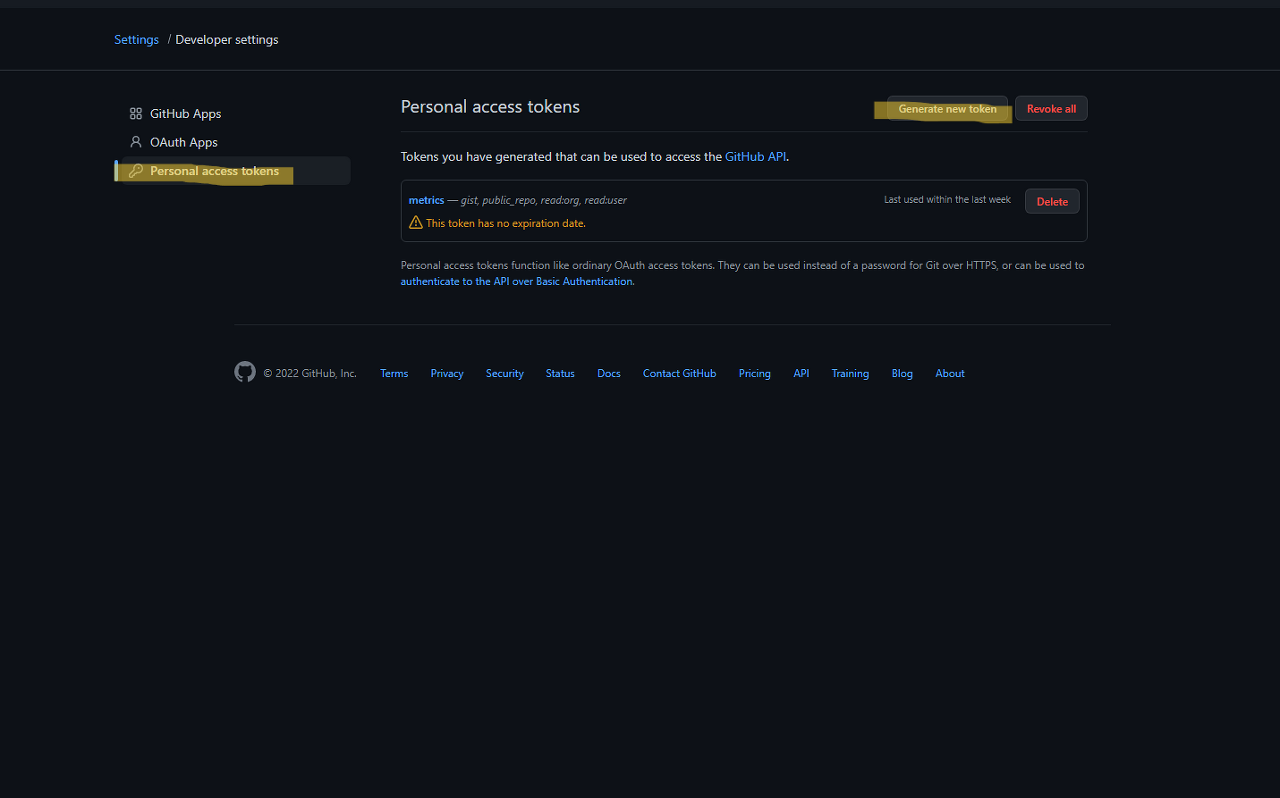

Personal access tokens 클릭 -> Generate new token 클릭

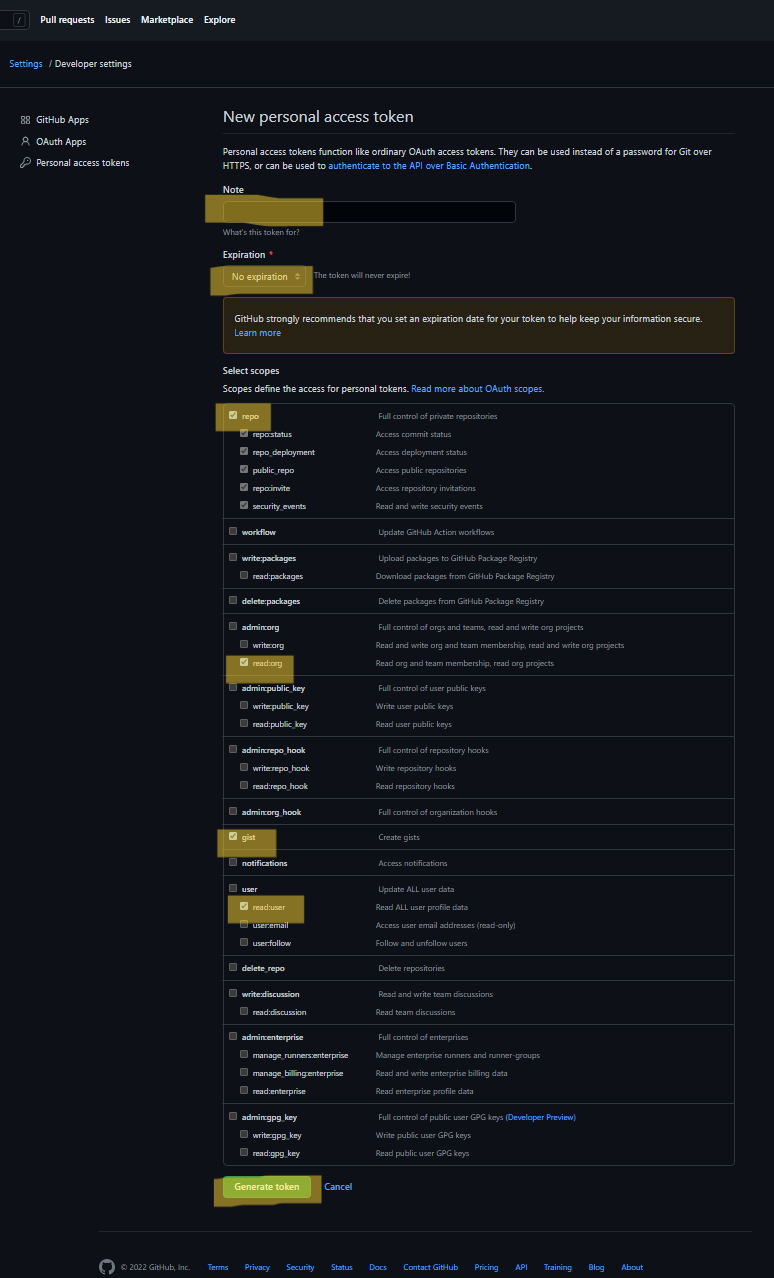

note에 metrics 입력 -> Expiration에 No expiration 설정(하지 않으면 기한이 생겨 주기적으로 재설정 필요) -> repo, read:org, gist, read:user 클릭 -> Generate token 클릭



### **레포지토리에 토큰 연결**
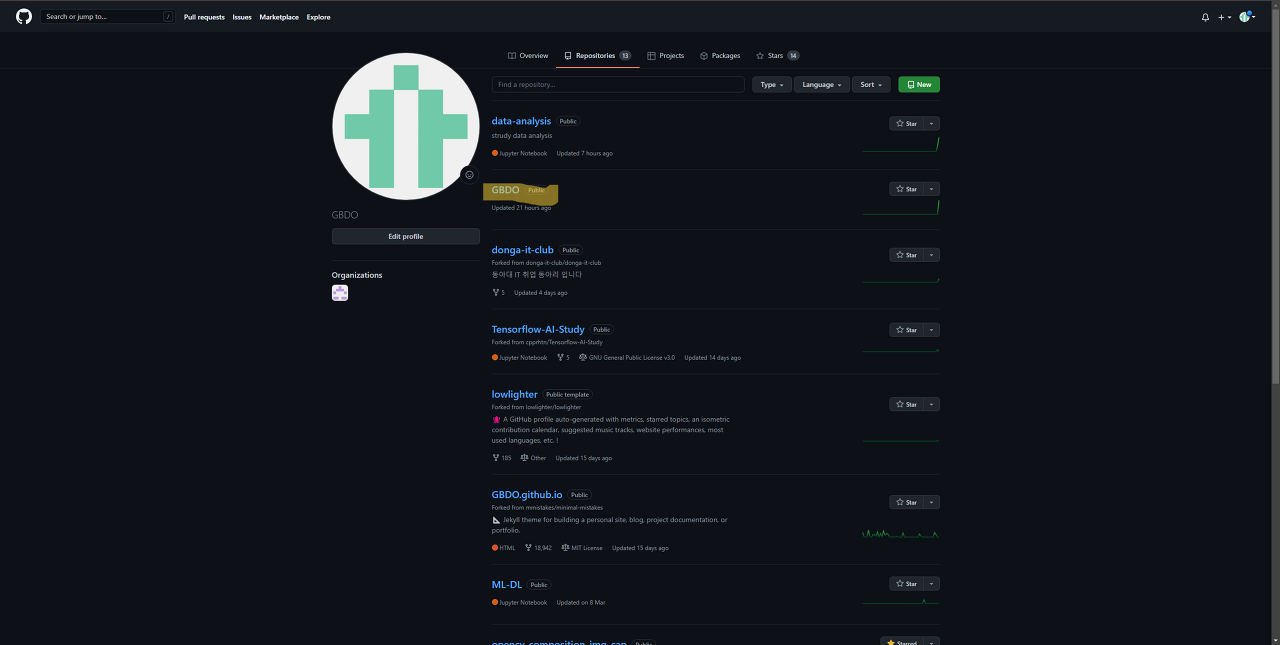


깃허브 이름으로 생성한 레포 클릭

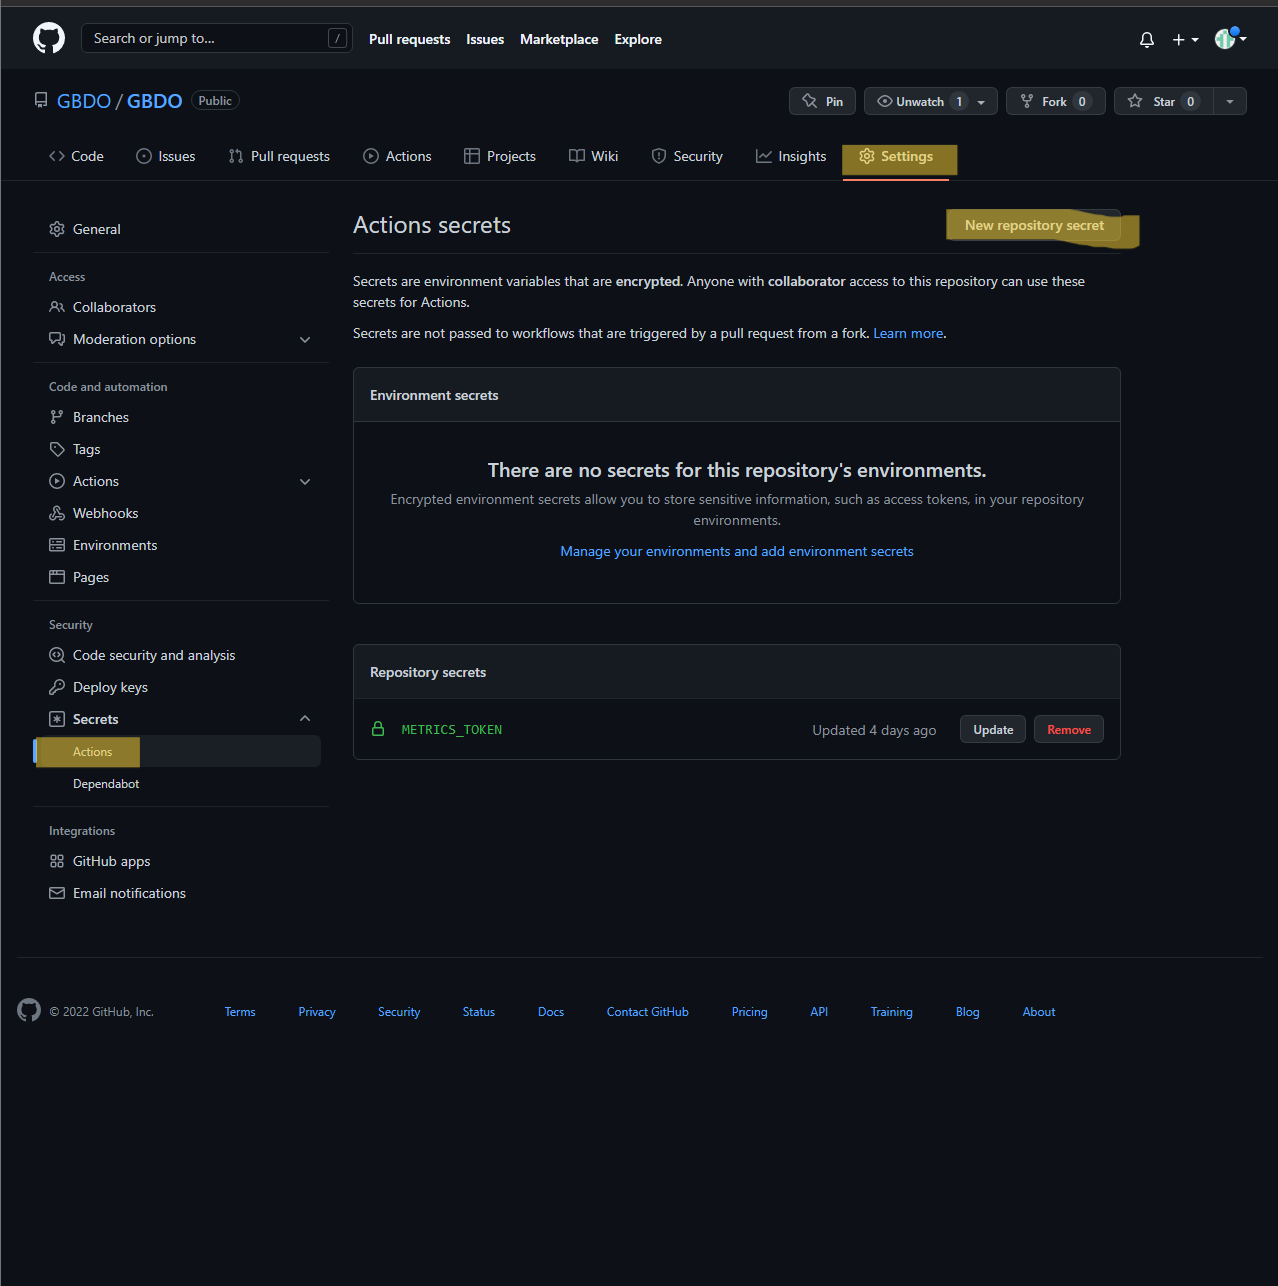

Settings 탭 클릭 -> Secrets 아래의 Actions 클릭 -> New repository secret 클릭

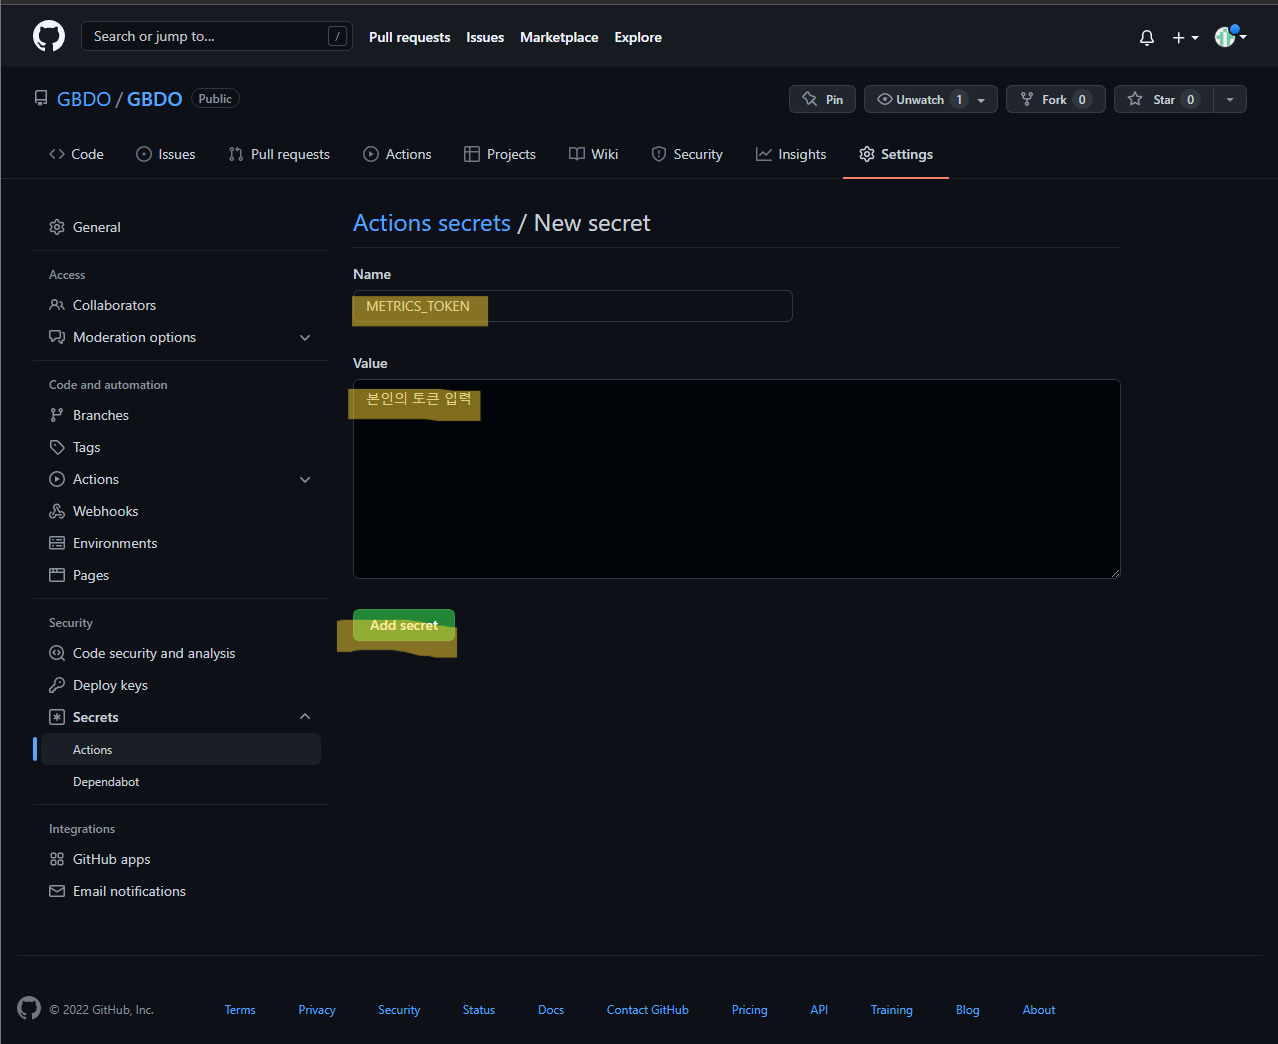

Name에 METRICS_TOKEN 입력 -> Value에 생성된 토큰 입력 -> Add secret 클릭



### **워크플로우 생성**

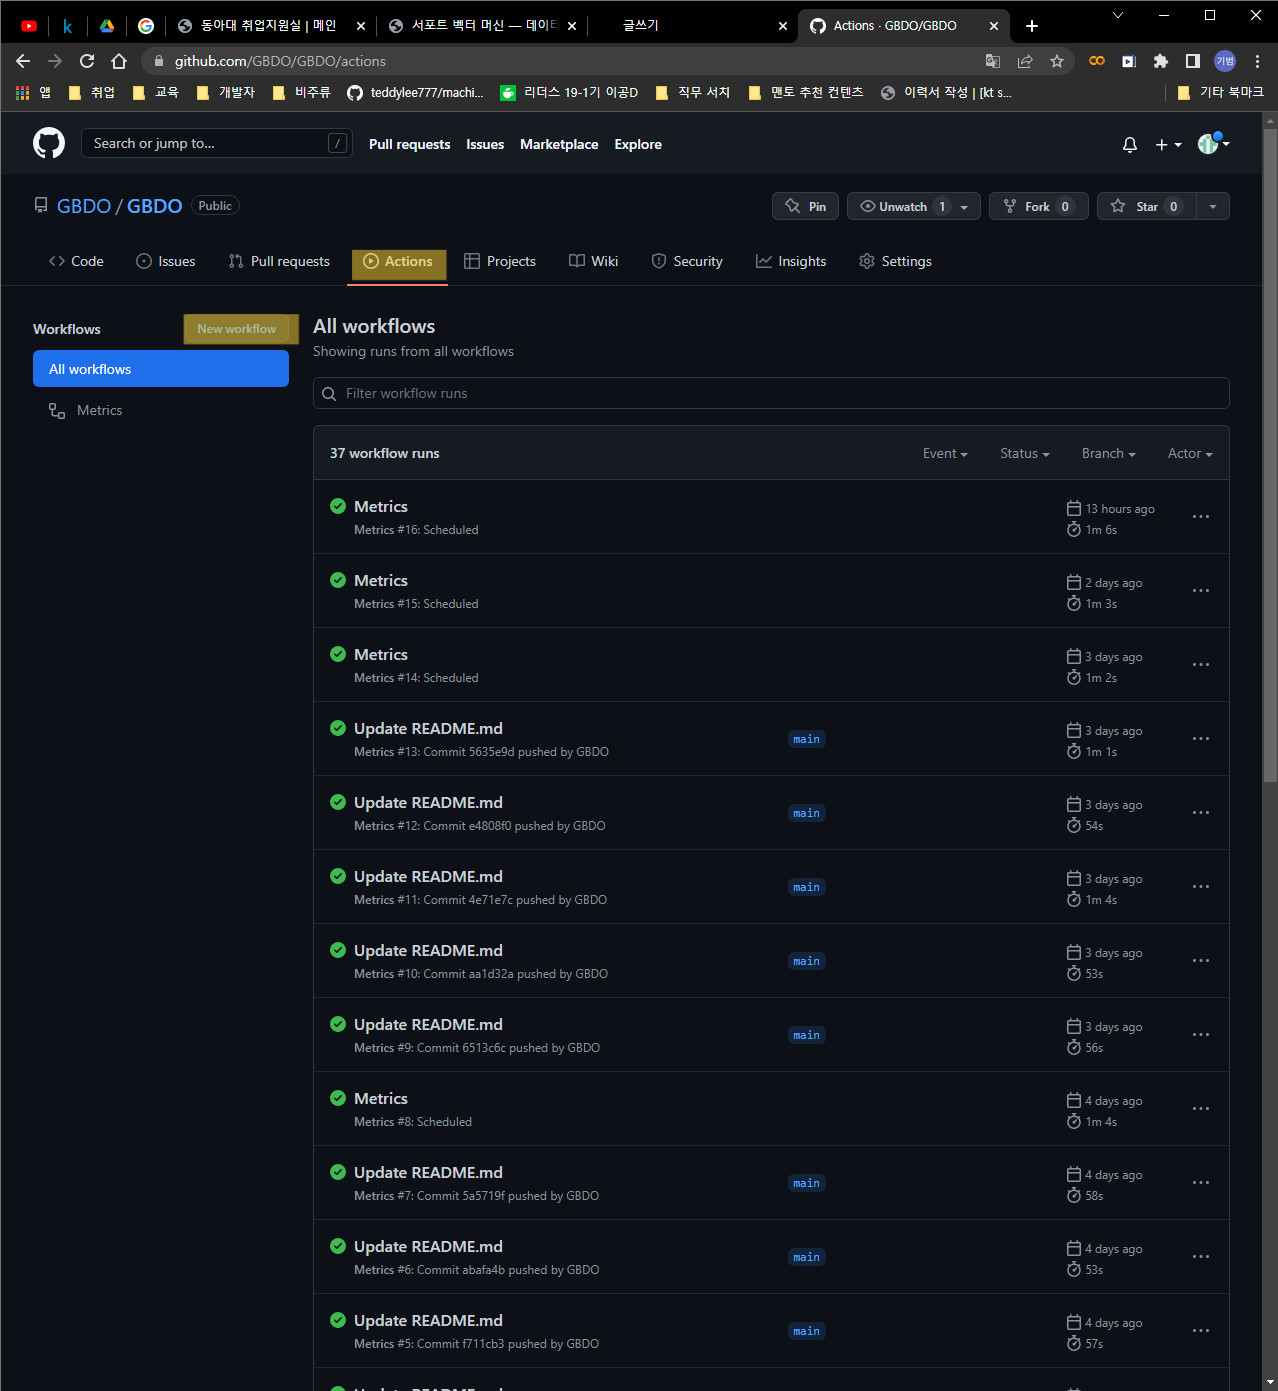

깃허브 이름으로 생성된 레포의 Actions 탭 클릭 -> New workflow 클릭

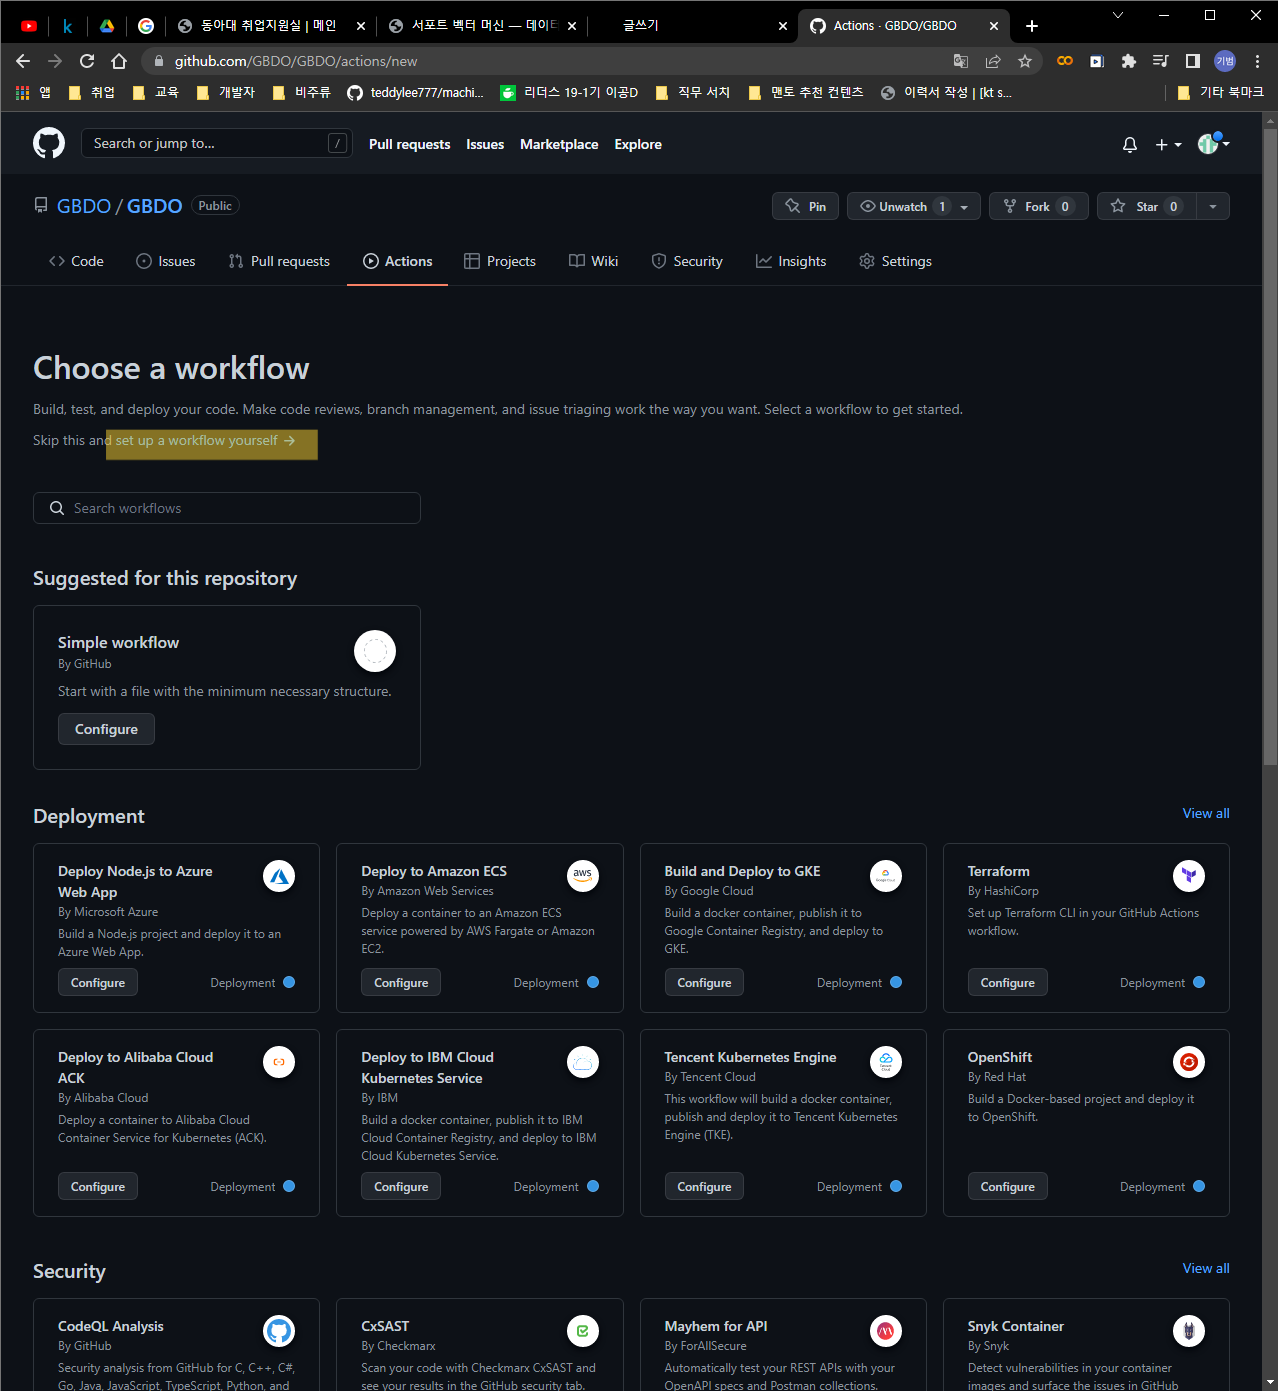


set up a workflow yourself 클릭, 우리들은 워크플로우를 불러오는 것이 아니라 복사, 붙어넣을 것이기 때문에 직접 설정에 해당합니다.

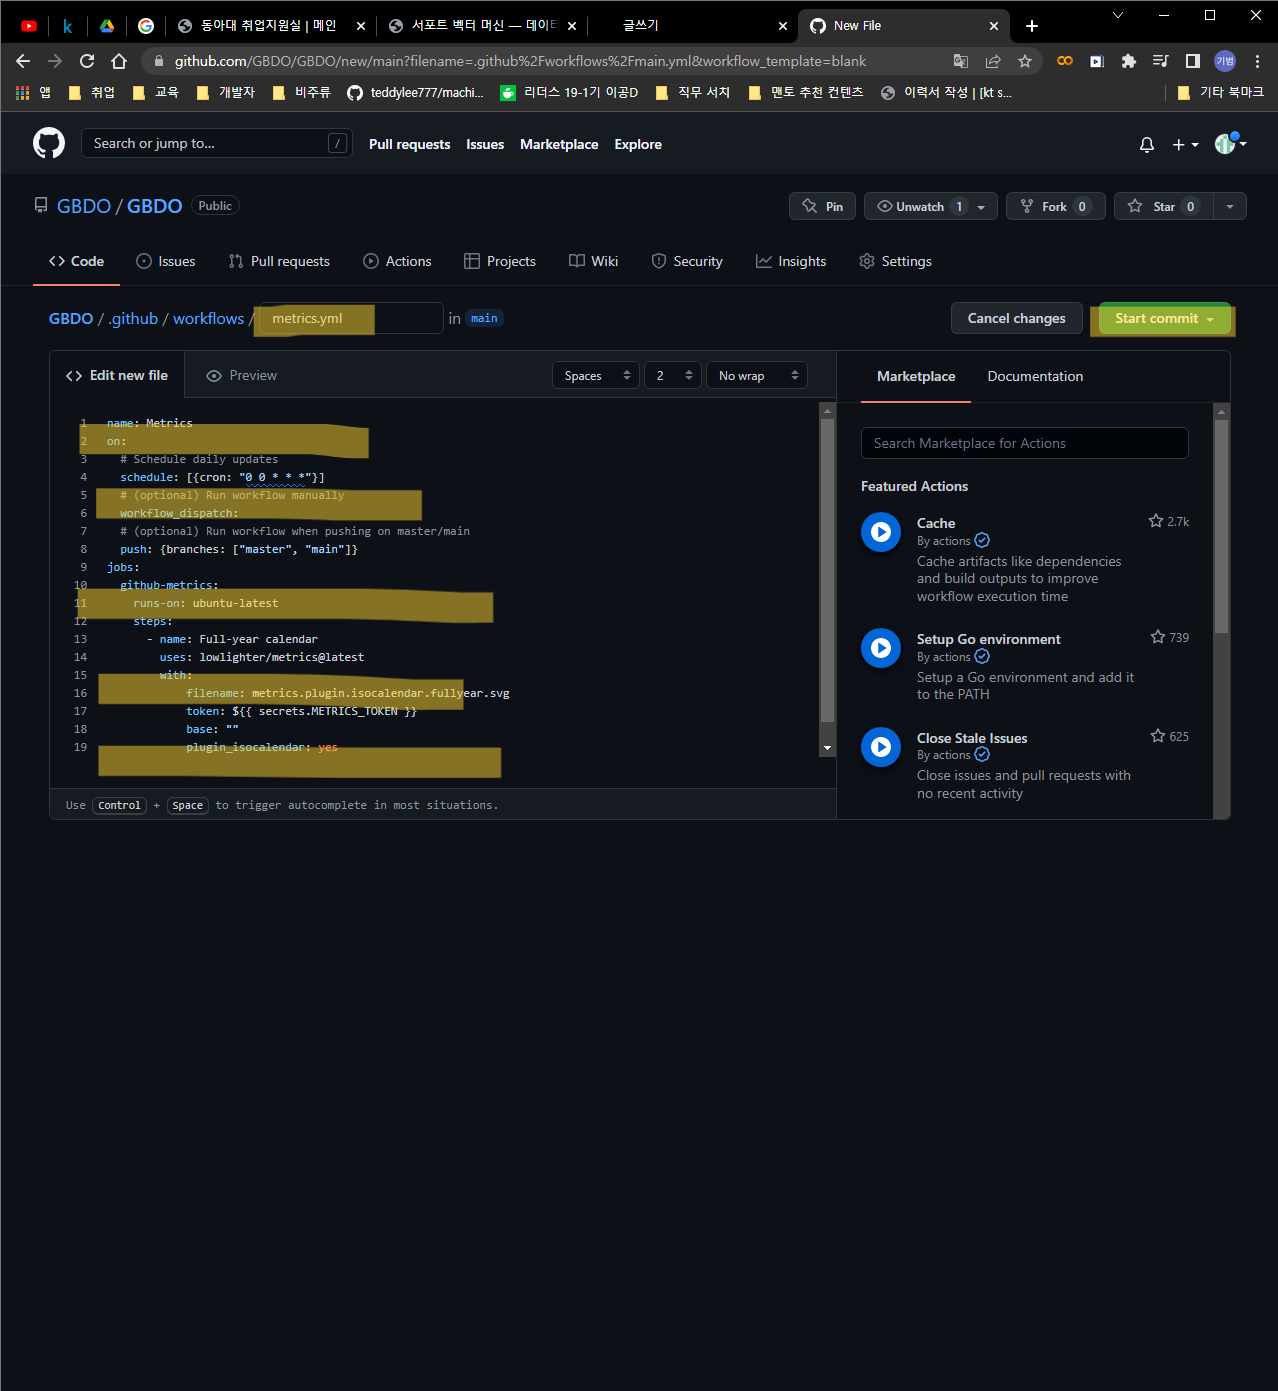

workflow의 이름은 metrics.yml 입력 -> Edit new file에 아래 코드 입력

```
name: Metrics
on:
  # Schedule daily updates
  schedule: [{cron: "0 0 * * *"}]
  # (optional) Run workflow manually
  workflow_dispatch:
  # (optional) Run workflow when pushing on master/main
  push: {branches: ["master", "main"]}
jobs:
  github-metrics:
    runs-on: ubuntu-latest
    steps:
      - name: Full-year calendar
        uses: lowlighter/metrics@latest
        with: 
            filename: metrics.plugin.isocalendar.fullyear.svg
            token: ${{ secrets.METRICS_TOKEN }}
            base: ""
            plugin_isocalendar: yes
            plugin_isocalendar_duration: full-year
```

코드변경 없이 그대로 작성하면 됩니다.

### **마무리**

위의 작업을 모두 완료하면 아래와 같이 깃허브 이름의 레포에 'metrics.plugin.isocalendar.fullyear.svg' 파일이 생성됩니다.

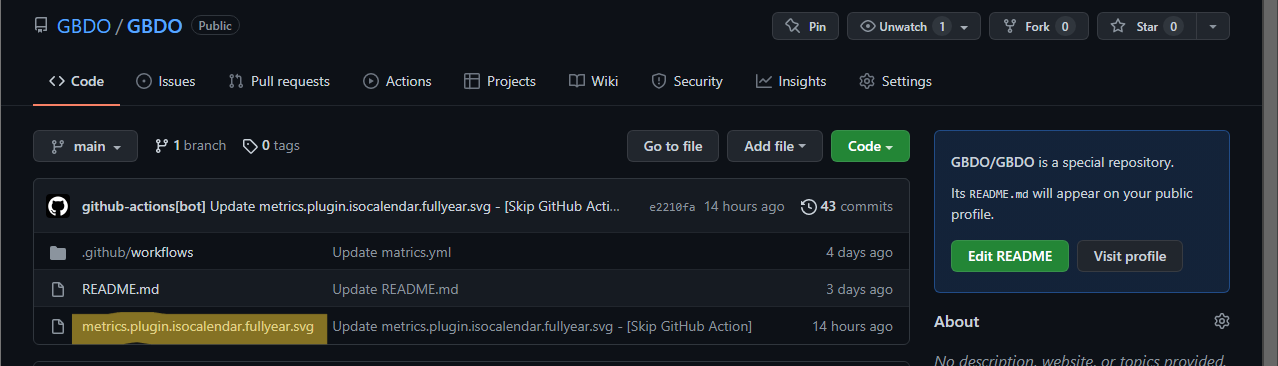

README.md 파일에 아래 코드를 입력하면 깃허브 홈 화면에 1년간 commit 추이를 확인할 수 있는 commit graph가 생성됩니다.

```
![Metrics](/metrics.plugin.isocalendar.fullyear.svg)
```